___
# MINIPROJETO 1

## <font color='red'>Thiago Ramalho Carletti</font>
___

## <font color='blue'>Número de computadores disponíveis para alunos</font>

___
### Itens 1 a 3 - Resolução:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\trcar\Desktop\Insper\2º Semestre\Ciência dos dados\Github\CD\Mini-Projeto1


In [2]:
ESCOLAS = pd.read_csv("ESCOLAS.csv", encoding="iso8859-1",sep = '|')

C:\Users\trcar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ESCOLAS

,NU_ANO_CENSO,CO_ENTIDADE,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
0,2015,23181737,AFONSO GONCALVES DE FREITAS EEF,00015,1,02/02/2015,18/12/2015,2,2304,23020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,33134707,JARDIM DOS PIRILAMPOS CRECHE MATERNAL LTDA,0170P,1,02/02/2015,18/12/2015,3,3306,33018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,15543064,E M E F BRANCA DE NEVE,00010,1,02/02/2015,24/12/2015,1,1505,15015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,42142989,CENTRO MUNICIPAL DE EDUCACAO INFANTIL COMECINH...,00010,1,05/02/2015,18/12/2015,4,4201,42004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,13072366,ESCOLA MUNICIPAL IPIRANGA,MI413,1,09/03/2015,18/12/2015,1,1304,13013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2015,31358630,COLEGIO ESTUDANTIL DE MERCES,00003,2,NaN,NaN,3,3112,31064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,25021737,EMEF CAPITAO MANOEL GOMES,00006,2,NaN,NaN,2,2501,25004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,43153500,EMEF TIMOTHEO JUNQUEIRA DOS SANTOS,00003,1,02/03/2015,23/12/2015,4,4304,43021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2015,33524211,ESCOLA MUNICIPAL PROFESSOR ROBERTO LYRA,11002,1,09/02/2015,18/12/2015,3,3306,33017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2015,25124692,INSTITUTO EDUCACIONAL PINGO DE MEL,00006,1,02/02/2015,23/12/2015,2,2501,25004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
ESCOLAS.computadores = ESCOLAS.NU_COMP_ALUNO
computadores = ESCOLAS.computadores.fillna(0)
computadores.describe()

count    272996.000000
mean          5.607921
std          18.651450
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max        1503.000000
Name: NU_COMP_ALUNO, dtype: float64

In [5]:
computadores.var()

347.87660371676975

___
### Itens 4 a 6 - Resolução:

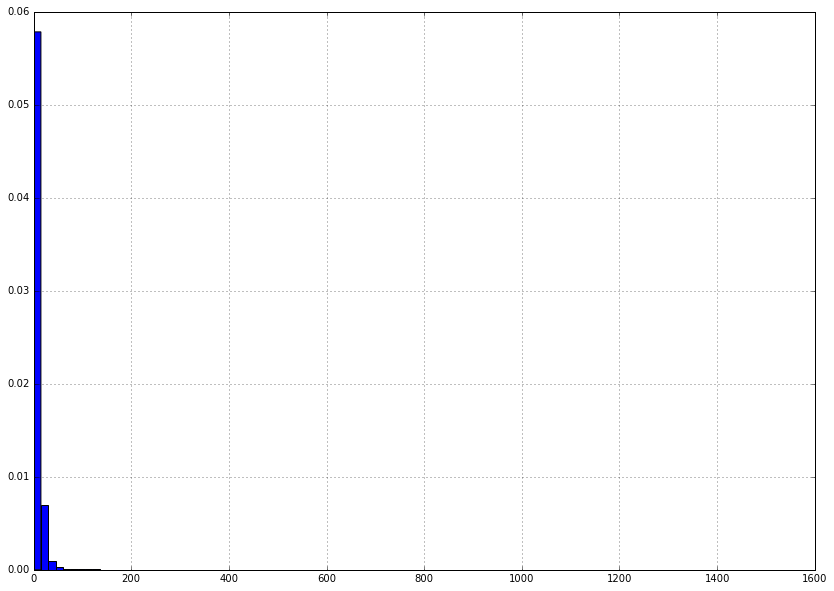

In [6]:
computadores.hist(normed=True, bins = 100, figsize=(14,10))

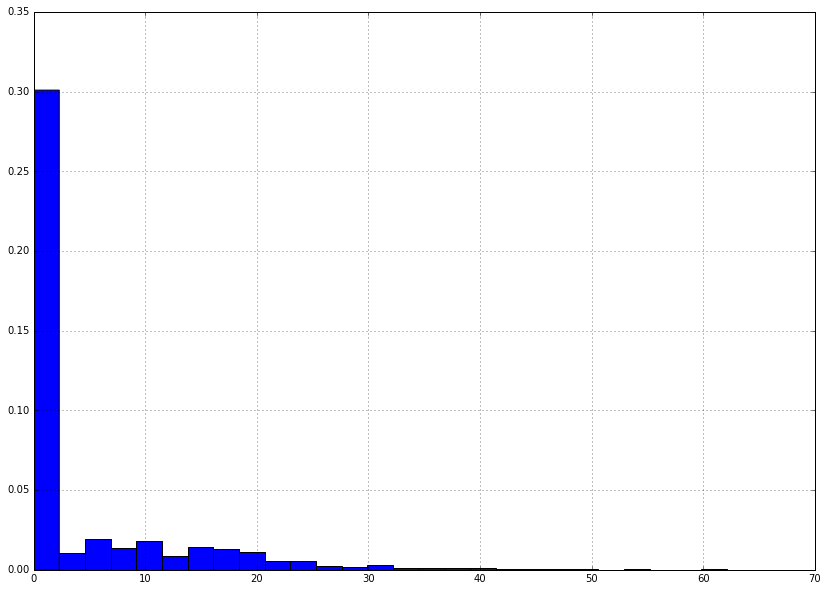

In [7]:
computadores[computadores<70].hist(normed=True, bins = 30, figsize=(14,10))

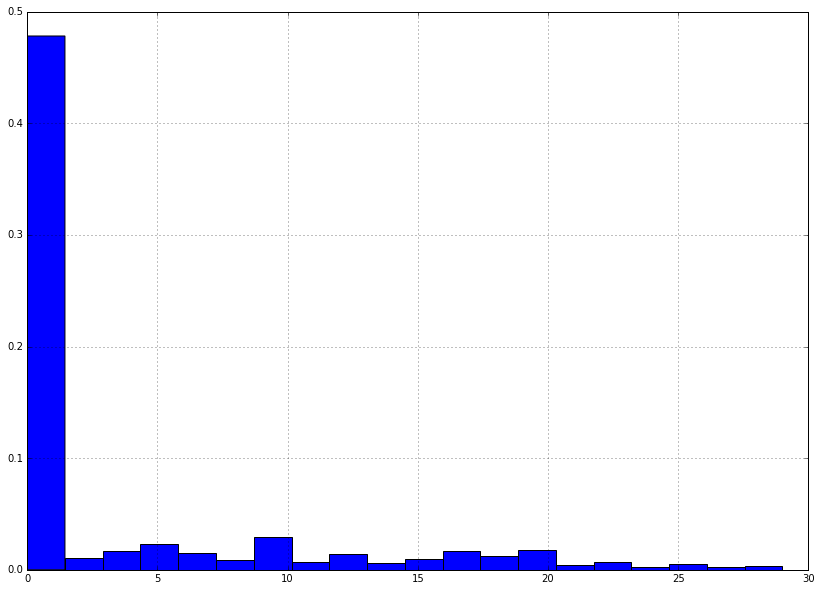

In [8]:
computadores[computadores < 30].hist(normed=True, bins = 20, figsize=(14,10))

#### Previsão 
Visto os dois primeiros gráficos, é possível afirmar que a variável atua de acordo com uma distribuição exponencial com alpha aproximadamente 1/5,6 ou uma destribuição gama, com K igual a 1 e teta igual a 1/5,6.

In [9]:
computadorest = computadores[computadores < 30]
computadorest = pd.Series(data=sorted(computadorest))

In [10]:
fg = stats.gamma.fit(computadores)
fga, fgb, fgc = stats.gamma.fit(computadores)
fg

(0.011461630040587881, -3.0485130725975137e-26, 1.5622080340832398)

___
### Itens 7 a 9 - Resolução:

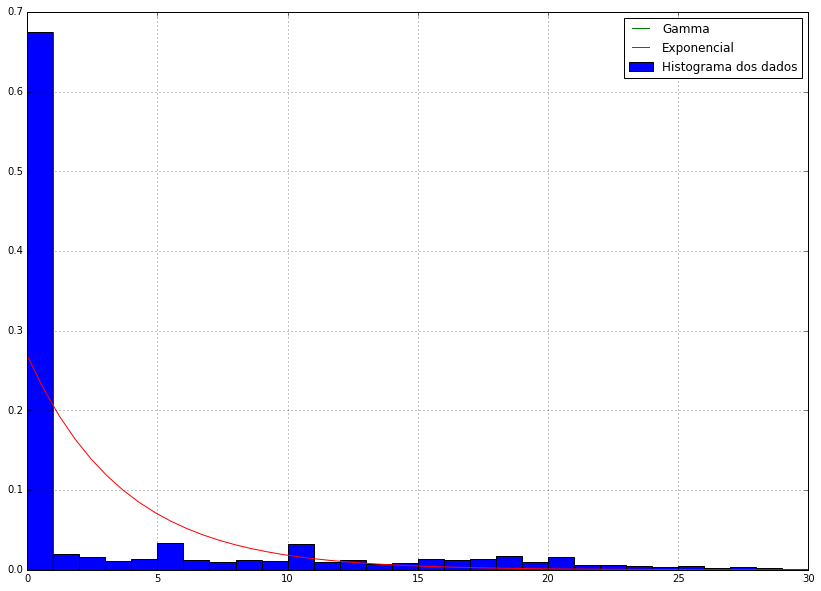

In [11]:
mu_exp = computadorest.mean()

# k para a gamma é escolhido entre 1 e 2 baseado na forma do histograma e no efeito que k tem na forma da gamma
#k_gamma = 1

# Estimamos theta da distribuição gamma
#theta_gamma = computadorest.mean()/k_gamma


x = np.linspace(0, 30, 50)

fig = plt.figure(figsize=(14,10))


# histograma e densidade teórica
#plt.plot(kind='hist', data=computadores, bins=range(0, 31), normed=True, label="Histograma dos dados")
computadorest.hist(normed=True, bins=range(0, 31), figsize=(14,10), label="Histograma dos dados")
exponencial = stats.expon.pdf(x, scale=mu_exp)
#gamma = stats.gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma)
gamma = stats.gamma.pdf(x, scale=fga, loc=fgb, a=fgc)
#gammafit = stats.gamma(fg)
#gfy = stats.gamma.pdf(x, fg)

plt.plot(x, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica
plt.plot(x, exponencial, '-', color='red', label="Exponencial") # Plota a exponencial teórica

plt.legend()

In [12]:
# dados ordenados e quantis teóricos - QQplot

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(computadorest)):
    acc = (i - 0.5) / len(computadorest)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)



In [13]:
computadorest.quantile(0.6)

0.0

In [14]:
# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_exp = stats.expon.ppf(fra, scale=mu_exp) # quantis teóricos da exponencial
q_gamma = stats.gamma.ppf(fra, scale=fga, loc=0, a=fgc)



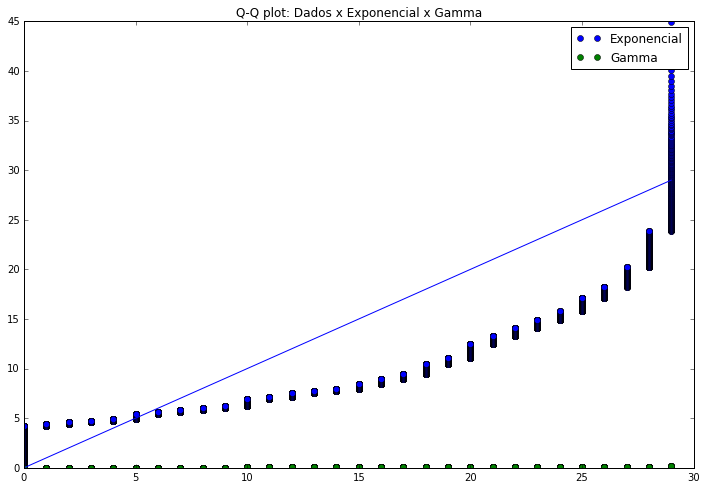

In [15]:
fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

exp_plot, = plt.plot(computadorest, q_exp, 'o', color="blue", label="Exponencial")
gamma_plot, = plt.plot(computadorest, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[exp_plot, gamma_plot])
plt.plot((min(computadorest), max(computadorest)), (min(computadorest), max(computadorest)), '-')


In [23]:


#for i in range(len(computadorest)):
#    plt.plot((computadorest[i], computadorest[i]), (q_exp[i], computadorest[i]), '-', color='red', alpha=0.3  )
#    plt.plot((computadorest[i], computadorest[i]), (q_gamma[i], computadorest[i]), '-', color='green', alpha=0.3  )


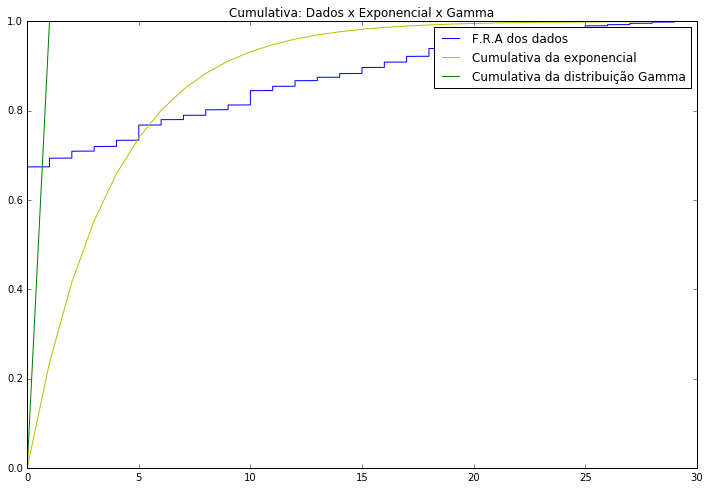

In [22]:
# fra e FDA
cdf_exponencial = stats.expon.cdf(computadorest, scale=mu_exp) #FDA
cdf_gamma = stats.gamma.cdf(computadorest, scale=fga, loc=fgb, a=fgc)


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x Gamma")

dados_fra_plot, = plt.plot(computadorest, fra, '-', color='blue', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(computadorest, cdf_exponencial, '-', color='y', label = "Cumulativa da exponencial")
cdf_gamma_plot, = plt.plot(computadorest, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")

plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot])


#for i in range(len(computadorest)):
 #   plt.plot((computadorest[i], computadorest[i]), (fra[i], cdf_exponencial[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
 #   plt.plot((computadorest[i], computadorest[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
    

___
### Itens 10 e 11 - Resolução:

In [17]:
erro_quadratico_exponencial = sum((computadorest - q_exp)**2)
erro_quadratico_gamma = sum((computadorest - q_gamma)**2)

print("Erro quadrático da exponencial :{:4.3f}\n".format(erro_quadratico_exponencial))
print("Erro quadrático da gamma :{:4.3f}\n".format(erro_quadratico_gamma))


Erro quadrático da exponencial :3170082.374

Erro quadrático da gamma :15509672.813



In [18]:
eqm_exp = erro_quadratico_exponencial/len(computadorest)
eqm_gamma = erro_quadratico_gamma/len(computadorest)

print("Erro quadratico médio da exponencial :", eqm_exp)
print("Erro quadratico médio da gamma :", eqm_gamma)

Erro quadratico médio da exponencial : 11.9783049982
Erro quadratico médio da gamma : 58.6040264703


In [19]:
soma_diferenças_exponencial = sum(abs(computadorest - q_exp))
soma_diferenças_gamma = sum(abs(computadorest - q_gamma))

print("Soma de diferenças da exponencial :", soma_diferenças_exponencial)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)


Soma de diferenças da exponencial : 681764.472351
Soma de diferenças da gamma : 983385.280774


#### Conclusão:

O modelo exponencial é mais adequado para a representação do sistema que a curva gama, visto o teste de aderência em que tanto a soma de diferenças quanto o erro quadrático médico daquela foram menores do que o erro quadrático médio daquela; sendo que, quanto menor o erro quadrádico, melhor é a adequação do modelo aos dados reais. Como prova disso temos a cumulativa da exponencial, que está muito mais adequada que a cumulativa gama.